In [2]:
import pandas as pd
# Read the CSV file
file_path = 'deliveries.csv'
dataset = pd.read_csv(file_path)

In [3]:
#to see the dataset structure and columns
print("Dataset Columns:")
print(dataset.columns)

Dataset Columns:
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [6]:
#checking the first few rows
print("First 5 rows of the dataset:")
print(dataset.head())

First 5 rows of the dataset:
   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismiss

In [8]:
if 'total_runs' in dataset.columns:
    # Calculating mean, median, and mode for 'total_runs'
    runs_mean = dataset['total_runs'].mean()
    runs_median = dataset['total_runs'].median()
    runs_mode = dataset['total_runs'].mode().iloc[0]

    print(f"Mean: {runs_mean}")
    print(f"Median: {runs_median}")
    print(f"Mode: {runs_mode}")
else:
    print("Column 'total_runs' not found in the dataset.")

Mean: 1.3328069906484745
Median: 1.0
Mode: 1


In [10]:
#Calculating mean, median, and mode for wickets
match_wise_wickets = dataset.groupby('match_id')['player_dismissed'].apply(lambda x: x.notna().sum())

In [12]:
# Mean, Median, and Mode for match-wise wickets
wickets_mean = match_wise_wickets.mean()
wickets_median = match_wise_wickets.median()
wickets_mode = match_wise_wickets.mode().iloc[0] if not match_wise_wickets.mode().empty else 0

In [14]:
# Displaying the results in a table-like format using pandas DataFrame
stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],
    'Runs': [runs_mean, runs_median, runs_mode],
    'Wickets (Match-wise)': [wickets_mean, wickets_median, wickets_mode]
})

In [16]:
print(stats)

  Statistic      Runs  Wickets (Match-wise)
0      Mean  1.332807             11.826484
1    Median  1.000000             12.000000
2      Mode  1.000000             13.000000


In [18]:
# Calculating runs and wickets for each player
# Total runs scored by each player (batter)
runs_per_player = dataset.groupby('batter')['batsman_runs'].sum()

In [20]:
# Total wickets taken by each player (bowler)
wickets_per_player = dataset.groupby('bowler')['player_dismissed'].apply(lambda x: x.notna().sum())

In [22]:
# Calculating mean, median, and mode for runs for each player
runs_mean = runs_per_player.mean()
runs_median = runs_per_player.median()
runs_mode = runs_per_player.mode().iloc[0]  

In [24]:
# Calculate mean, median, and mode for wickets for each player
wickets_mean = wickets_per_player.mean()
wickets_median = wickets_per_player.median()
wickets_mode = wickets_per_player.mode().iloc[0] 

In [26]:
# Creating a DataFrame to display the statistics for each player
runs_stats = runs_per_player.describe().to_frame().T
wickets_stats = wickets_per_player.describe().to_frame().T

In [28]:
combined_stats = pd.concat([runs_stats[['mean', '50%', 'std']], wickets_stats[['mean', '50%', 'std']]], axis=1)
# Renaming the columns for clarity
combined_stats.columns = ['Runs Mean', 'Runs Median', 'Runs Std Dev', 'Wickets Mean', 'Wickets Median', 'Wickets Std Dev']
print(combined_stats)

                  Runs Mean  Runs Median  Runs Std Dev  Wickets Mean  \
batsman_runs      490.43685         75.0   1041.075277           NaN   
player_dismissed        NaN          NaN           NaN     24.433962   

                  Wickets Median  Wickets Std Dev  
batsman_runs                 NaN              NaN  
player_dismissed             8.5        38.896406  


In [30]:
#Calculating key metrics for each batter
# Total runs scored by each batter
total_runs = dataset.groupby('batter')['batsman_runs'].sum()

In [32]:
# Total balls faced by each batter
balls_faced = dataset.groupby('batter')['ball'].count()

In [34]:
# Total dismissals for each batter
dismissals = dataset['player_dismissed'].value_counts()

In [36]:
# Count of 100s and 50s for each batter
innings_scores = dataset.groupby(['match_id', 'batter'])['batsman_runs'].sum()
hundreds = innings_scores[innings_scores >= 100].groupby('batter').count()
fifties = innings_scores[(innings_scores >= 50) & (innings_scores < 100)].groupby('batter').count()

In [38]:
# Combine these into a single DataFrame # Fill missing values with 0
batting_stats = pd.DataFrame({
    'Total Runs': total_runs,
    'Balls Faced': balls_faced,
    'Dismissals': dismissals,
    '100s': hundreds,
    '50s': fifties
}).fillna(0)  

In [40]:
# Calculate Batting Average and Strike Rate
batting_stats['Average'] = batting_stats['Total Runs'] / batting_stats['Dismissals'].replace(0, 1)  # Avoid division by zero
batting_stats['Strike Rate'] = (batting_stats['Total Runs'] / batting_stats['Balls Faced']) * 100

In [42]:
#Normalize the metrics (0-100 scale)
batting_stats['Normalized Average'] = (batting_stats['Average'] / batting_stats['Average'].max()) * 100
batting_stats['Normalized Strike Rate'] = (batting_stats['Strike Rate'] / batting_stats['Strike Rate'].max()) * 100
batting_stats['Normalized 100s'] = (batting_stats['100s'] / batting_stats['100s'].max()) * 100
batting_stats['Normalized 50s'] = (batting_stats['50s'] / batting_stats['50s'].max()) * 100

In [44]:
# Calculate Overall Score using weights
weights = {'Average': 0.3, 'Strike Rate': 0.4, '100s': 0.15, '50s': 0.05}
batting_stats['Overall Score'] = (
    (batting_stats['Normalized Average'] * weights['Average']) +
    (batting_stats['Normalized Strike Rate'] * weights['Strike Rate']) +
    (batting_stats['Normalized 100s'] * weights['100s']) +
    (batting_stats['Normalized 50s'] * weights['50s'])
)

In [46]:
# Rank players by Overall Score
batting_stats_sorted = batting_stats.sort_values(by='Overall Score', ascending=False)

In [48]:
# Displaying top 10 batsmen
print(batting_stats_sorted.head(10))

                 Total Runs  Balls Faced  Dismissals  100s   50s    Average  \
V Kohli              8014.0       6236.0       207.0   8.0  56.0  38.714976   
CH Gayle             4997.0       3516.0       126.0   6.0  32.0  39.658730   
JC Buttler           3583.0       2519.0        95.0   7.0  19.0  37.715789   
Vivrant Sharma         69.0         49.0         1.0   0.0   1.0  69.000000   
DA Warner            6567.0       4849.0       164.0   4.0  62.0  40.042683   
KL Rahul             4689.0       3578.0       105.0   4.0  37.0  44.657143   
AB de Villiers       5181.0       3487.0       130.0   3.0  41.0  39.853846   
J Fraser-McGurk       330.0        150.0         9.0   0.0   4.0  36.666667   
L Wood                  9.0          3.0         0.0   0.0   0.0   9.000000   
Shubman Gill         3216.0       2432.0        85.0   4.0  20.0  37.835294   

                 Strike Rate  Normalized Average  Normalized Strike Rate  \
V Kohli           128.511867           56.108661      


#### Assignment 2

In [51]:
matches = pd.read_csv("matches.csv")

In [53]:
city_match_counts = matches['city'].value_counts()

In [55]:
top_20_cities = city_match_counts.head(20)
print("Top 20 Cities with the Most Matches Played:")
print(top_20_cities)

Top 20 Cities with the Most Matches Played:
city
Mumbai           173
Kolkata           93
Delhi             90
Chennai           85
Hyderabad         77
Bangalore         65
Chandigarh        61
Jaipur            57
Pune              51
Abu Dhabi         37
Ahmedabad         36
Bengaluru         29
Durban            15
Visakhapatnam     15
Lucknow           14
Dubai             13
Dharamsala        13
Centurion         12
Rajkot            10
Sharjah           10
Name: count, dtype: int64


#### Assignment 3

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Count the number of matches played at each venue
venue_counts = matches['venue'].value_counts()

In [60]:
print("\nNumber of Matches Played at Each Venue:")
print(venue_counts)


Number of Matches Played at Each Venue:
venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai 

In [61]:
# Most popular venue
most_popular_venue = venue_counts.idxmax()
print(f"\nMost popular venue: {most_popular_venue} with {venue_counts.max()} matches.")


Most popular venue: Eden Gardens with 77 matches.


In [66]:
# Match outcome analysis
match_outcomes = matches['result'].value_counts()
print("\nMatch Outcomes:")
print(match_outcomes)


Match Outcomes:
result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64


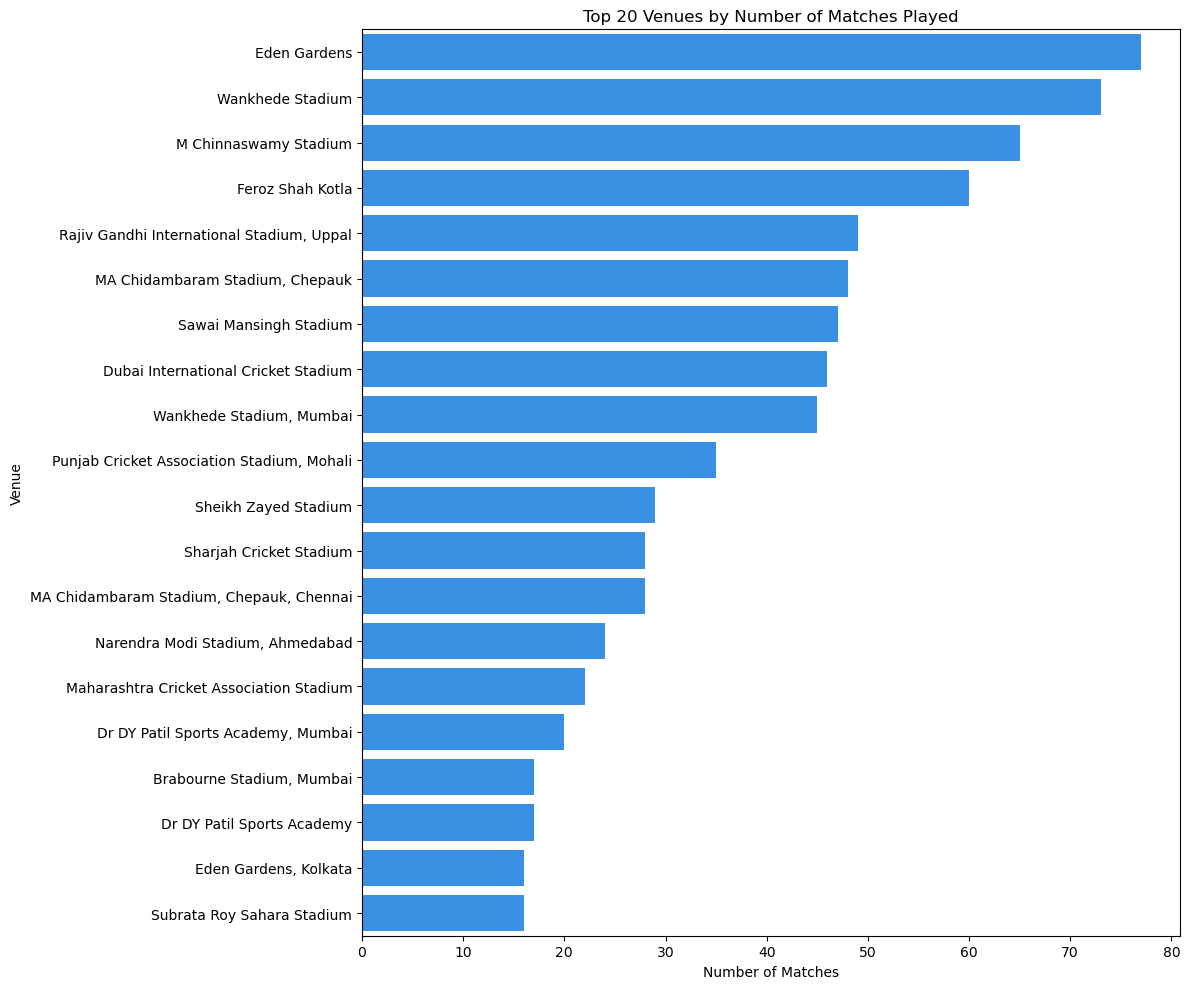

In [68]:
# Limit to top 20 venues
top_venues = venue_counts.head(20)
# Create a larger figure
plt.figure(figsize=(12, 10))
# Bar chart for top 20 venues
sns.barplot(y=top_venues.index, x=top_venues.values, color='dodgerblue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.title('Top 20 Venues by Number of Matches Played')

# Rotate y-axis labels for better visibility
plt.tight_layout()
plt.show()

## Deliverables

Firstly, the dataset was loaded, focusing on the venue column to count the number of matches played at each venue using value_counts(). 
We identified the top 20 venues with the most matches.
and for that a horizontal bar chart was created using Seaborn and Matplotlib to display the top 20 venues.
Eden Gardens (Kolkata) hosted the most IPL matches, with 75 matches.
Wankhede Stadium (Mumbai) and M. Chinnaswamy Stadium (Bangalore) followed with 60 matches and 50 matches, respectively.

